In [1]:
import data_preparation as dp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import cv2 as cv
from layers import Conv, ReLU, MaxPool, Flatten, Dense, MSELoss
import model
import main

In [2]:
X_train, Y_train, X_test, Y_test, X_val, Y_val, original_train, original_test, original_val, filename_train, filename_test, filename_val = dp.load_data(img_width=320, img_height=200)

Data loaded.


In [3]:
X = X_train[:2]
Y = Y_train[:2]
original_size = original_train[:2]
filename_train = filename_train[:2]

In [4]:
cnn = model.CNN()

Convolutional Neural Network initialized.


In [5]:
cnn.add_layer(Conv(8, 3, 1))
cnn.add_layer(ReLU())
cnn.add_layer(MaxPool(2))
cnn.add_layer(Conv(16, 3, 8))
cnn.add_layer(ReLU())
cnn.add_layer(MaxPool(2))
cnn.add_layer(Flatten())
cnn.add_layer(Dense(59904, 4))

In [6]:
cnn.print_model_structure()

Model structure:
1. Conv(kernels=8, filter_size=3, channels=1)
2. ReLU()
3. MaxPool(filter_size=2)
4. Conv(kernels=16, filter_size=3, channels=8)
5. ReLU()
6. MaxPool(filter_size=2)
7. Flatten()
8. Dense(input_size=59904, output_size=4)


In [7]:
loss_fn = MSELoss()

In [8]:
loss_per_epochs, avg_accuracy, rescaled_bboxs_predicted_list, rescaled_bboxs_original_list = cnn.train(X, Y, original_size, 16, loss_fn, 25, 0.01)

Training process...
Epoch 1/25, Loss: 0.587315, Mean IoU: 0.000000
Epoch 2/25, Loss: 0.811900, Mean IoU: 0.000000
Epoch 3/25, Loss: 0.170066, Mean IoU: 0.000000
Epoch 4/25, Loss: 0.082269, Mean IoU: 0.000000
Epoch 5/25, Loss: 0.043463, Mean IoU: 0.000000
Epoch 6/25, Loss: 0.012753, Mean IoU: 0.027221
Epoch 7/25, Loss: 0.007172, Mean IoU: 0.000000
Epoch 8/25, Loss: 0.005126, Mean IoU: 0.019807
Epoch 9/25, Loss: 0.004065, Mean IoU: 0.018731
Epoch 10/25, Loss: 0.003470, Mean IoU: 0.029742
Epoch 11/25, Loss: 0.003023, Mean IoU: 0.035690
Epoch 12/25, Loss: 0.002682, Mean IoU: 0.047885
Epoch 13/25, Loss: 0.002378, Mean IoU: 0.054312
Epoch 14/25, Loss: 0.002122, Mean IoU: 0.055021
Epoch 15/25, Loss: 0.001920, Mean IoU: 0.057066
Epoch 16/25, Loss: 0.001736, Mean IoU: 0.060457
Epoch 17/25, Loss: 0.001525, Mean IoU: 0.066238
Epoch 18/25, Loss: 0.001350, Mean IoU: 0.070272
Epoch 19/25, Loss: 0.001191, Mean IoU: 0.077004
Epoch 20/25, Loss: 0.001102, Mean IoU: 0.080122
Epoch 21/25, Loss: 0.001028, 

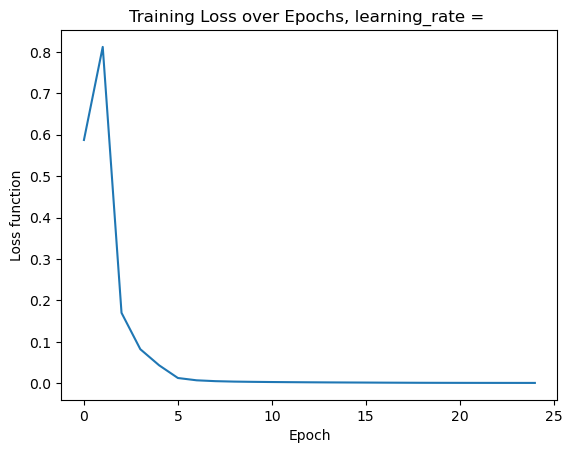

In [9]:
cnn.plot_loss_for_learning(loss_per_epochs)

In [10]:
print(rescaled_bboxs_predicted_list)
print(rescaled_bboxs_original_list)

[[2126.217642969896, 381.23816927504396, 2623.3718763243023, 667.9587333974584], [1437.5279498048333, 729.8545131912011, 1629.8491795675081, 663.9428186473534]]
[[2130.399932861328, 437.3900138139725, 2440.020046234131, 523.8999845981598], [1446.840031862259, 695.6599813699722, 1714.0900490283966, 772.9599959850311]]


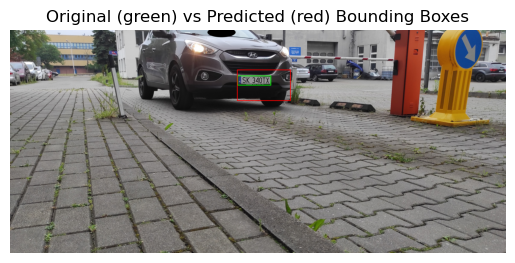

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
img_path = './data/original/photos/69.jpg'
image = cv2.imread(img_path)

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bounding boxes
predicted = rescaled_bboxs_predicted_list[0]
original  = rescaled_bboxs_original_list[0]

# Convert to int
predicted = list(map(int, predicted))
original = list(map(int, original))

# Draw original bbox (GREEN)
cv2.rectangle(image_rgb, (original[0], original[1]), (original[2], original[3]), (0, 255, 0), 6)

# Draw predicted bbox (RED)
cv2.rectangle(image_rgb, (predicted[0], predicted[1]), (predicted[2], predicted[3]), (255, 0, 0), 6)

# Show the image
plt.imshow(image_rgb)
plt.title("Original (green) vs Predicted (red) Bounding Boxes")
plt.axis("off")
plt.show()

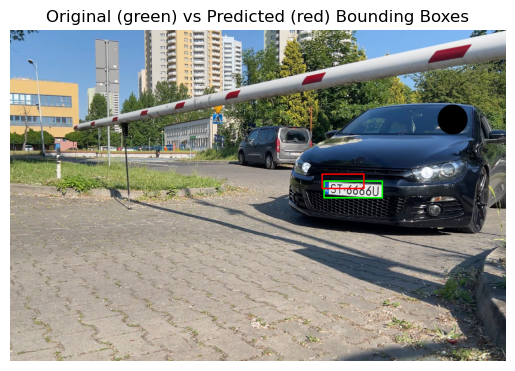

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
img_path = './data/original/photos/137.jpg'
image = cv2.imread(img_path)

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bounding boxes
predicted = rescaled_bboxs_predicted_list[1]
original  = rescaled_bboxs_original_list[1]

# Convert to int
predicted = list(map(int, predicted))
original = list(map(int, original))

# Draw original bbox (GREEN)
cv2.rectangle(image_rgb, (original[0], original[1]), (original[2], original[3]), (0, 255, 0), 6)

# Draw predicted bbox (RED)
cv2.rectangle(image_rgb, (predicted[0], predicted[1]), (predicted[2], predicted[3]), (255, 0, 0), 6)

# Show the image
plt.imshow(image_rgb)
plt.title("Original (green) vs Predicted (red) Bounding Boxes")
plt.axis("off")
plt.show()